In [26]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from pingouin import partial_corr

In [3]:
expert1_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/Item_level_scores_Katarina.csv'
expert2_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/Item_level_scores_Veerle.csv'
self_report_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/self_report_unified.csv'
gpt4_file = '/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/expt_gpt-4-1106-preview.dep_list_phq9items_score_classify2_editted_unified.csv'

In [4]:
expert1_df = pd.read_csv(expert1_file)
expert2_df = pd.read_csv(expert2_file)
self_report_df = pd.read_csv(self_report_file)
gpt4_df = pd.read_csv(gpt4_file)

In [5]:
symptoms_columns = ['Anhedonia', 'Depressed_Mood', 'Insomnia_or_Hypersomnia',
       'Fatigue', 'Poor_appetite_or_overeating', 'Worthlessness_or_Guilt',
       'Difficulty_concentrating', 'Psychomotor_agitation_or_retardation',
       'Suicidal_ideation']
       
score_columns = ['score_Anhedonia', 'score_Depressed_Mood',
       'score_Insomnia_or_Hypersomnia', 'score_Fatigue',
       'score_Poor_appetite_or_overeating', 'score_Worthlessness_or_Guilt',
       'score_Difficulty_concentrating',
       'score_Psychomotor_agitation_or_retardation', 'score_Suicidal_ideation']

isInferred_columns = ['isInferred_Anhedonia', 'isInferred_Depressed_Mood',
         'isInferred_Insomnia_or_Hypersomnia', 'isInferred_Fatigue',
         'isInferred_Poor_appetite_or_overeating',
         'isInferred_Worthlessness_or_Guilt',
         'isInferred_Difficulty_concentrating',
         'isInferred_Psychomotor_agitation_or_retardation',
         'isInferred_Suicidal_ideation']

In [6]:
expert1_df = expert1_df.fillna(0)
expert2_df = expert2_df.fillna(0)

In [7]:
X_df = gpt4_df[gpt4_df[score_columns].sum(1)>=0][score_columns]
# Step 1: Compute the covariance matrix
cov_matrix = np.cov(X_df.values, rowvar=False)
corr_matrix = np.corrcoef(X_df.values, rowvar=False)
# Step 2: Compute the precision matrix (inverse of covariance matrix)
precision_matrix = np.linalg.inv(corr_matrix)
# Step 3: Compute the partial correlation matrix
partial_corr_matrix = [[precision_matrix[i, j]/np.sqrt(precision_matrix[i, i]*precision_matrix[j, j]) for i in range(len(X_df.columns))] for j in range(len(X_df.columns))]
precision_matrix = pd.DataFrame(precision_matrix.round(2), columns=X_df.columns, index=X_df.columns)
partial_corr_matrix = pd.DataFrame(partial_corr_matrix, columns=X_df.columns, index=X_df.columns)

<AxesSubplot:>

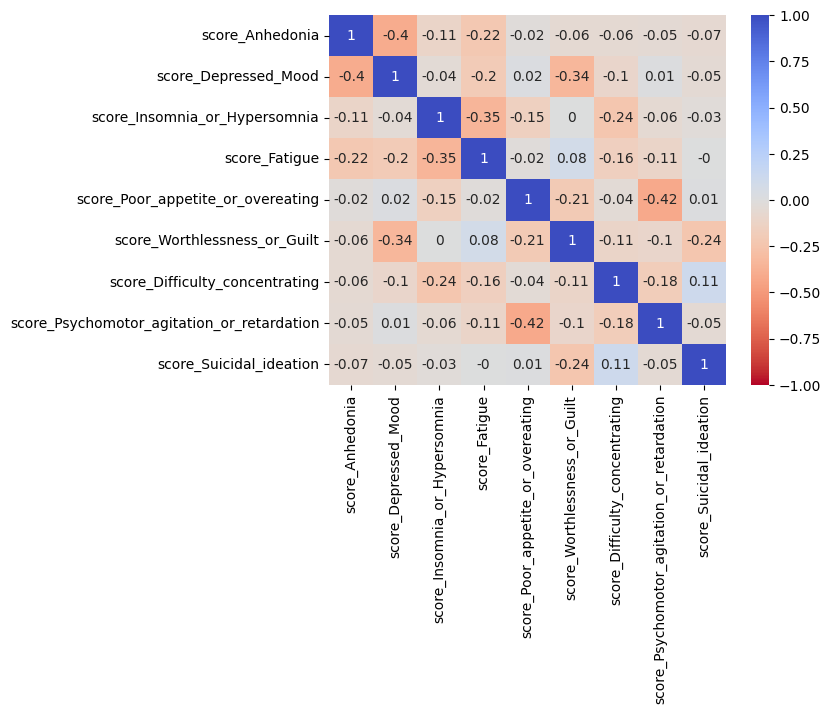

In [8]:
sns.heatmap(partial_corr_matrix.round(2), annot=True, cmap='coolwarm_r', 
            vmin=-1, vmax=1
            )

<AxesSubplot:>

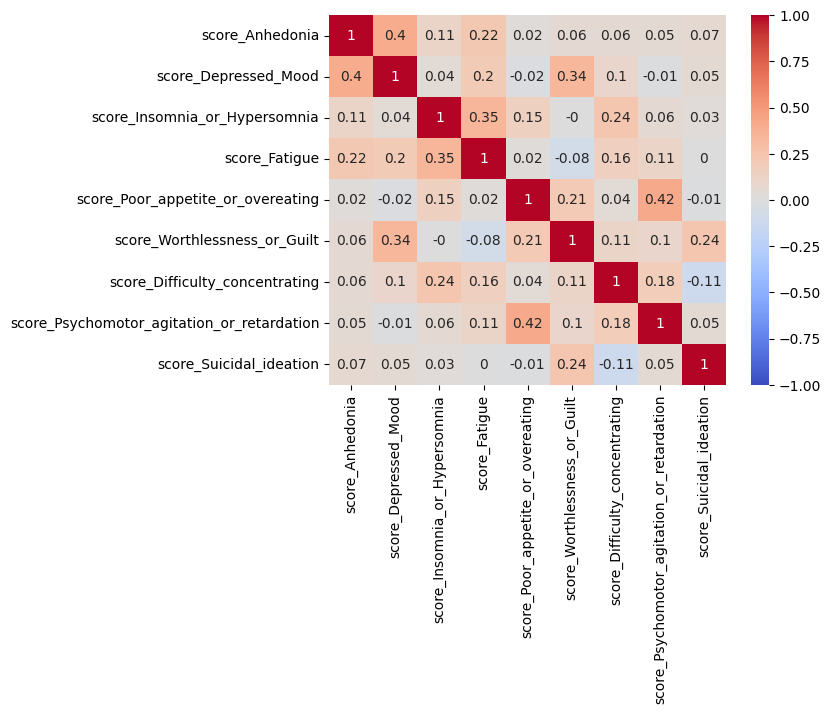

In [9]:
partial_corr_matrix = np.ones((len(score_columns), len(score_columns)))
for symp_x in score_columns:
    for symp_y in score_columns:
        if symp_x == symp_y:
            continue
        other_symps = [symp for symp in score_columns if symp not in [symp_x, symp_y]]
        partial_corr_val = partial_corr(X_df, symp_x, symp_y, other_symps, method='pearson')
        partial_corr_matrix[score_columns.index(symp_x), score_columns.index(symp_y)] = partial_corr_val['r']
partial_corr_matrix = pd.DataFrame(partial_corr_matrix, columns=score_columns, index=score_columns)

sns.heatmap(partial_corr_matrix.round(2), annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1
            )

In [10]:
X_df = self_report_df[self_report_df[score_columns].sum(1)>=0][score_columns]
# Step 1: Compute the covariance matrix
cov_matrix = np.cov(X_df.values, rowvar=False)
corr_matrix = np.corrcoef(X_df.values, rowvar=False)
# Step 2: Compute the precision matrix (inverse of covariance matrix)
precision_matrix = np.linalg.inv(corr_matrix)
# Step 3: Compute the partial correlation matrix
partial_corr_matrix = [[precision_matrix[i, j]/np.sqrt(precision_matrix[i, i]*precision_matrix[j, j]) for i in range(len(X_df.columns))] for j in range(len(X_df.columns))]
precision_matrix = pd.DataFrame(precision_matrix.round(2), columns=X_df.columns, index=X_df.columns)
partial_corr_matrix = pd.DataFrame(partial_corr_matrix, columns=X_df.columns, index=X_df.columns)

<AxesSubplot:>

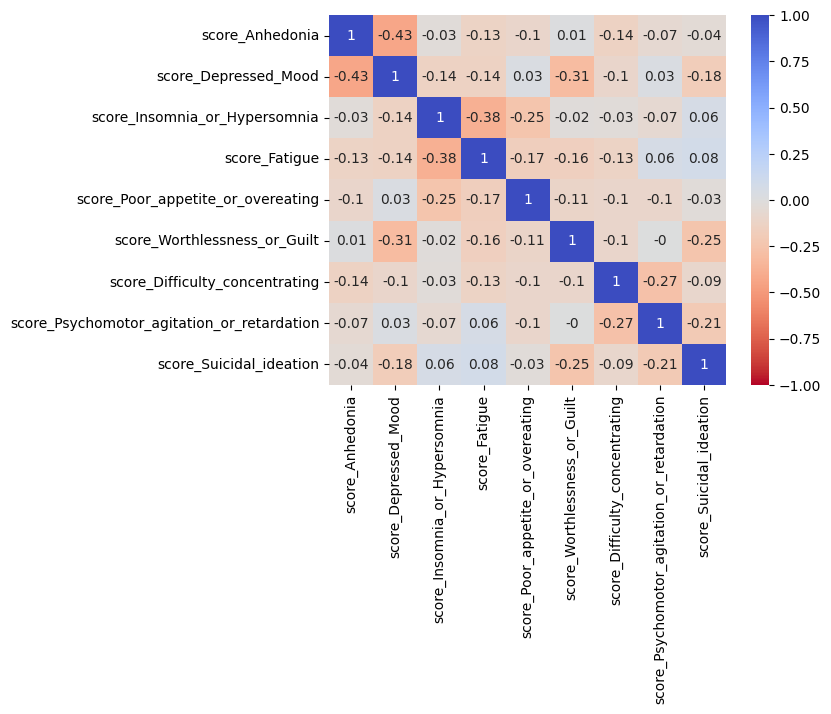

In [11]:
sns.heatmap(partial_corr_matrix.round(2), annot=True, cmap='coolwarm_r', 
            vmin=-1, vmax=1
            )

<AxesSubplot:>

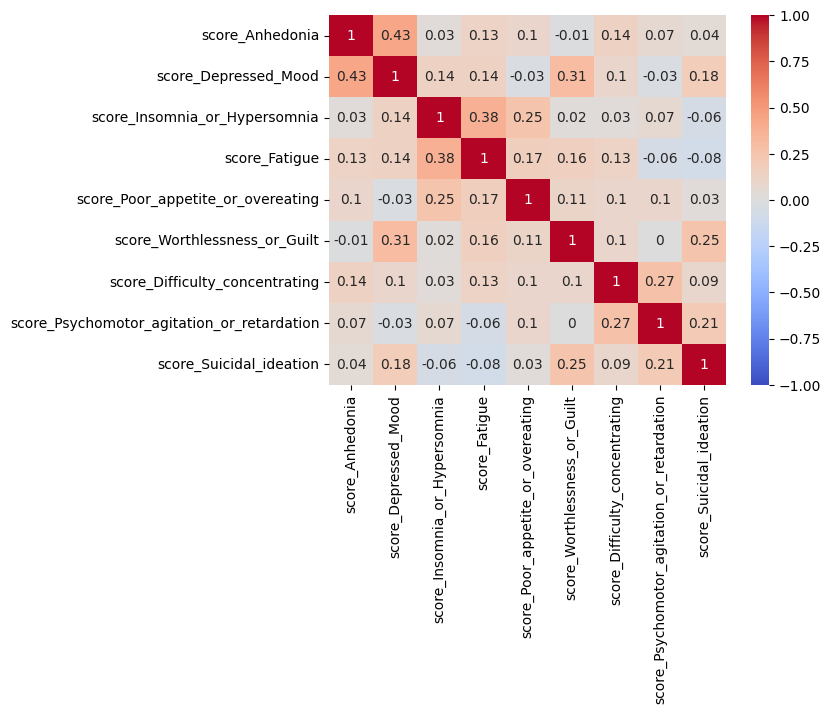

In [12]:
partial_corr_matrix = np.ones((len(score_columns), len(score_columns)))
for symp_x in score_columns:
    for symp_y in score_columns:
        if symp_x == symp_y:
            continue
        other_symps = [symp for symp in score_columns if symp not in [symp_x, symp_y]]
        partial_corr_val = partial_corr(X_df, symp_x, symp_y, other_symps, method='pearson')
        partial_corr_matrix[score_columns.index(symp_x), score_columns.index(symp_y)] = partial_corr_val['r']
partial_corr_matrix = pd.DataFrame(partial_corr_matrix, columns=score_columns, index=score_columns)

sns.heatmap(partial_corr_matrix.round(2), annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1
            )

In [13]:
from matplotlib.colorbar import ColorbarBase
from matplotlib import gridspec
import matplotlib.colors

In [18]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as clr

In [19]:
from matplotlib import font_manager
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
bold_font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
# Create a font properties object
custom_font = font_manager.FontProperties(fname=font_path)
custom_font_bold = font_manager.FontProperties(fname=bold_font_path)


Text(0.5, 1.0, 'Average\n')

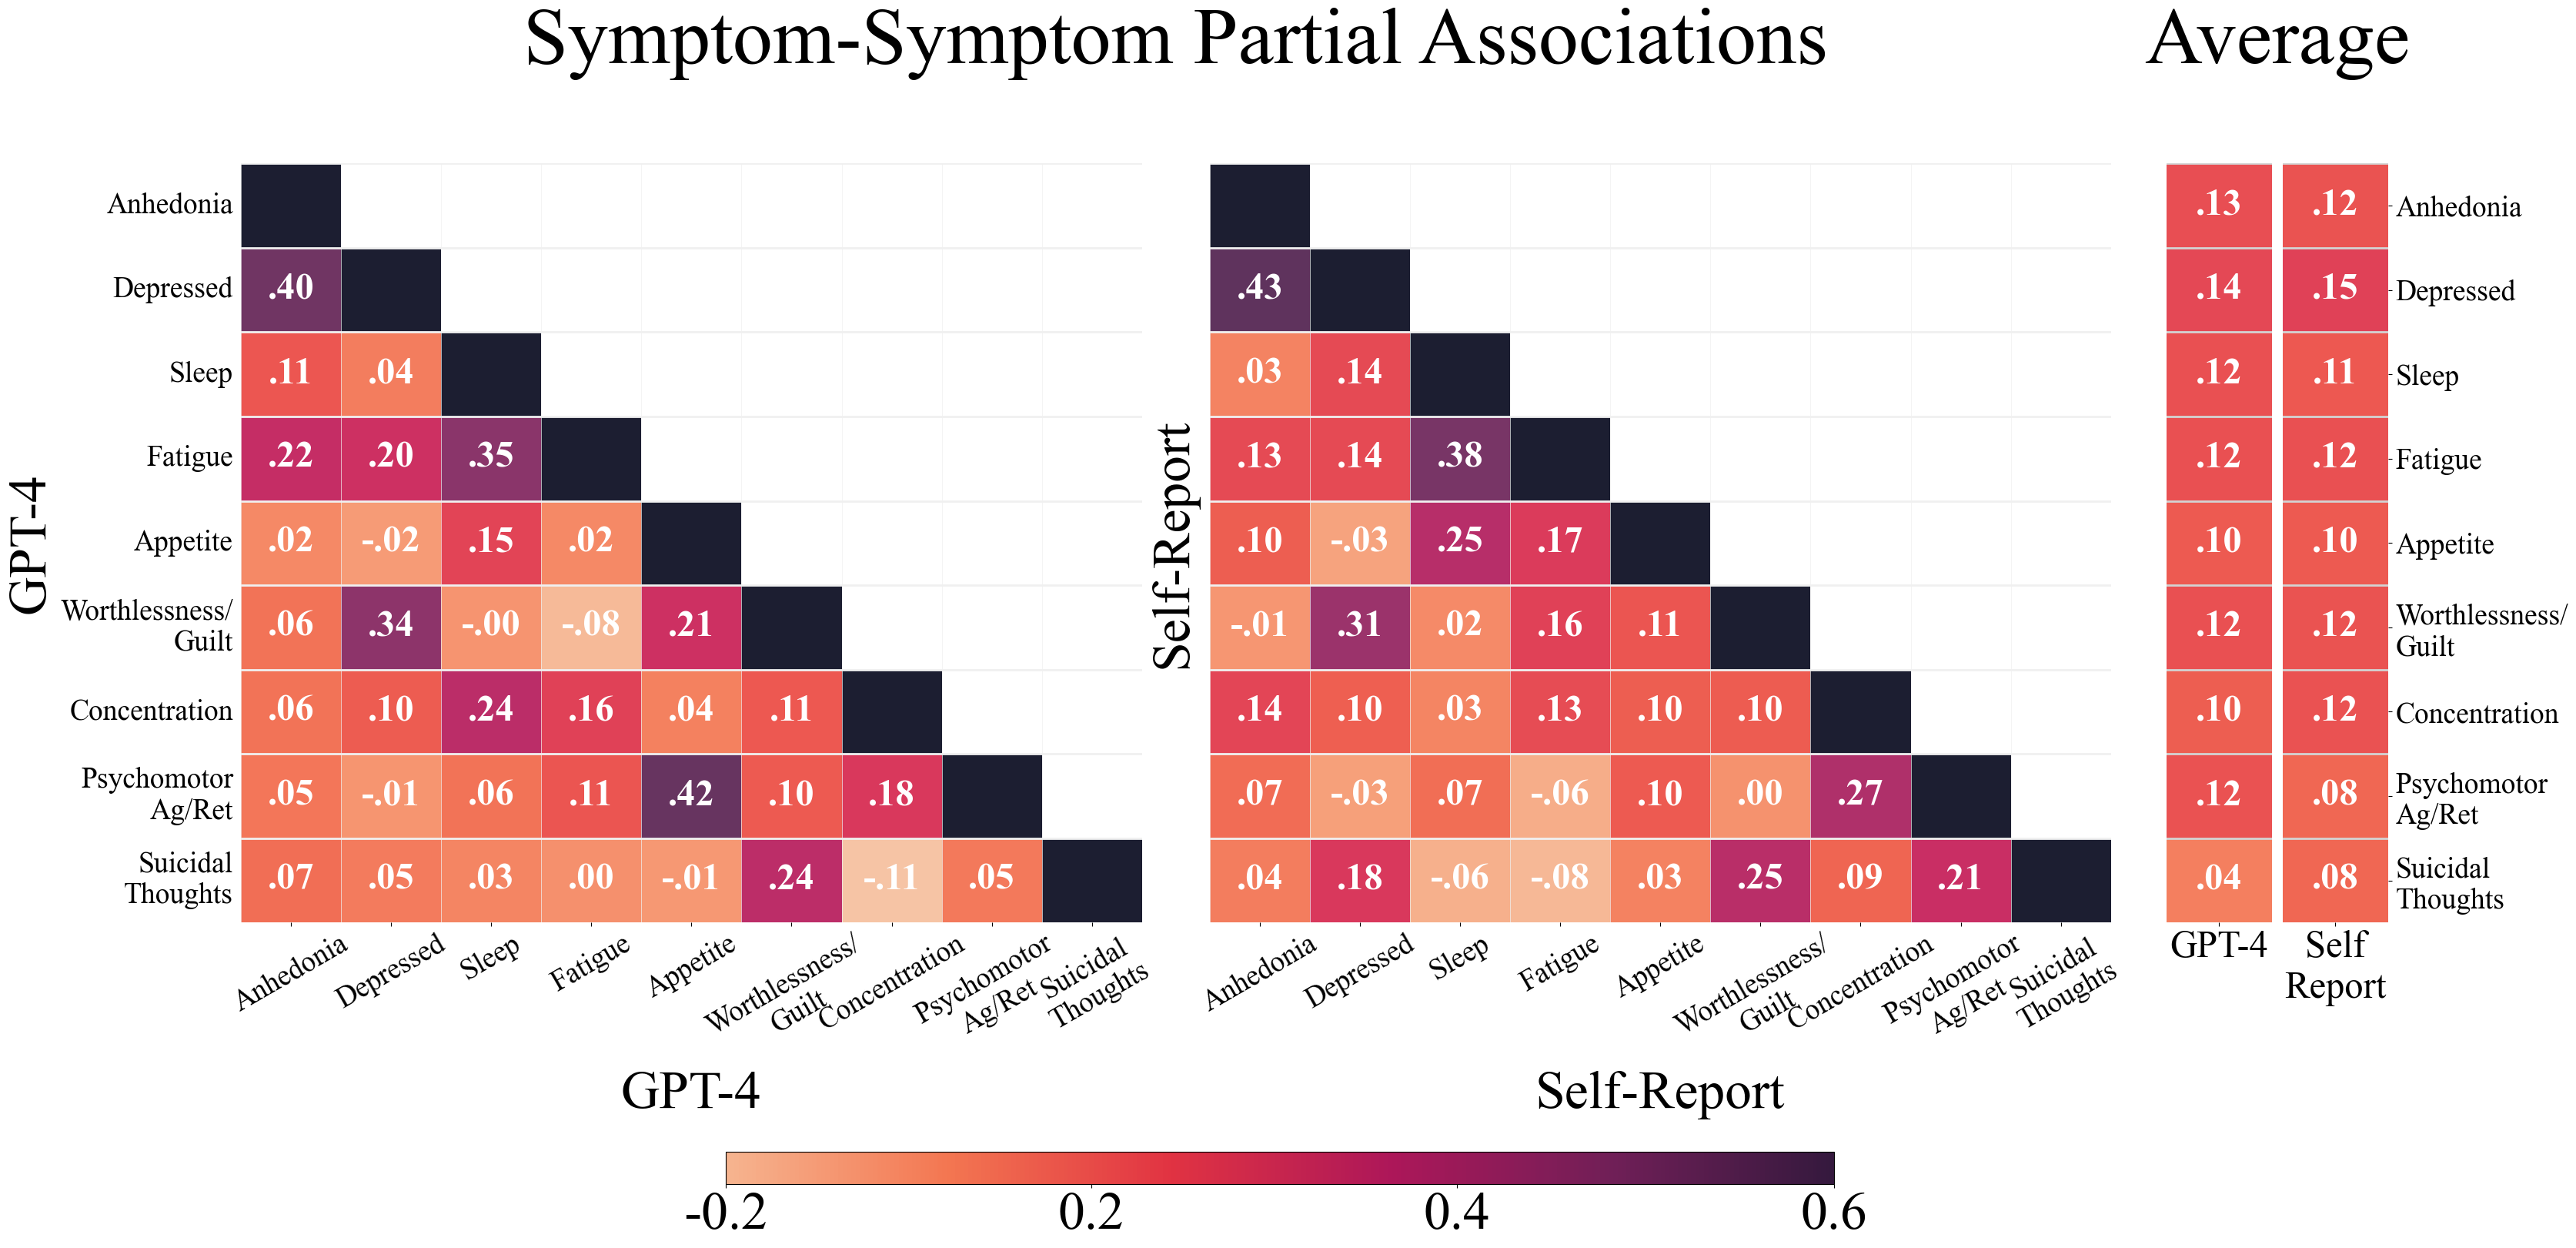

In [20]:
# Make gridspec such that there are two parts to the figure, 
# one which will be split into subplots for correlation matrix 
# and the other will be for the average
# The former will have more wspace between the heatmaps and the latter will have less wspace

f = plt.figure(figsize=(36, 17))
gs1 = gridspec.GridSpec(1, 2, figure=f, right=0.80, bottom=0.3, width_ratios=[0.5, 0.5], wspace=0.075)
gs2 = gridspec.GridSpec(1, 2, figure=f, left=0.82, bottom=0.3, width_ratios=[0.5, 0.5], wspace=0.1)
gs3 = gridspec.GridSpec(1, 1, figure=f, top=0.125, bottom=0.1, left=0.3, right=0.7, hspace=0.1)

# put gpt4 corr map in a0 and self report corr map in a1
# put gpt4 avg in a2 and self report avg in a3
a0 = f.add_subplot(gs1[0])
a1 = f.add_subplot(gs1[1])
a2 = f.add_subplot(gs2[0])
a3 = f.add_subplot(gs2[1])
a4 = f.add_subplot(gs3[0])

# Correlation in between all the items 
partial_corr_matrix = np.ones((len(score_columns), len(score_columns)))
for symp_x in score_columns:
    for symp_y in score_columns:
        if symp_x == symp_y:
            continue
        other_symps = [symp for symp in score_columns if symp not in [symp_x, symp_y]]
        partial_corr_val = partial_corr(gpt4_df, symp_x, symp_y, other_symps, method='pearson')
        partial_corr_matrix[score_columns.index(symp_x), score_columns.index(symp_y)] = partial_corr_val['r']
corr_df = pd.DataFrame(partial_corr_matrix, columns=score_columns, index=score_columns)
# corr_df = gpt4_df[[i for i in score_columns]].corr().values.round(2)
corr_df_annot = corr_df.apply(lambda col: [f'{v:.2f}'[-3:] if v>=0 else '-'+f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20

mask = np.zeros_like(corr_df, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False

# f, (a0, a1, a2, a3) = plt.subplots(1, 4, figsize=(36, 15), gridspec_kw={'width_ratios': [3, 3, 0.35, 0.35], 'wspace': 0.1})

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap='rocket_r', vmin=-.2, vmax=0.6, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'}, 
            ax=a0, cbar=False)

a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='#f0f0f0', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)


tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']

a0.set_xticklabels(tick_labels, rotation=30, fontsize=27, fontproperties=custom_font)
a0.set_yticklabels(tick_labels_y, rotation=0, fontsize=27,  fontproperties=custom_font)
a0.set_xlabel('GPT-4', fontsize=50, fontproperties=custom_font)
a0.set_ylabel('GPT-4', fontsize=50, fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).values.reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:] if v>=0 else '-'+f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap='rocket_r', vmin=-0.2, vmax=0.6, alpha=0.9, fmt='', ax=a2, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a2.axhline(i, color='lightgray', lw=2)

a2.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a2.yaxis.tick_right()
a2.tick_params(right=False, bottom=True, left=False)
a2.set_xticklabels(['GPT-4'], rotation=0, fontsize=35,  fontproperties=custom_font)

###########################
###########################

# Correlation in between all the items 
partial_corr_matrix = np.ones((len(score_columns), len(score_columns)))
for symp_x in score_columns:
    for symp_y in score_columns:
        if symp_x == symp_y:
            continue
        other_symps = [symp for symp in score_columns if symp not in [symp_x, symp_y]]
        partial_corr_val = partial_corr(self_report_df, symp_x, symp_y, other_symps, method='pearson')
        partial_corr_matrix[score_columns.index(symp_x), score_columns.index(symp_y)] = partial_corr_val['r']
corr_df = pd.DataFrame(partial_corr_matrix, columns=score_columns, index=score_columns)
corr_df_annot = corr_df.apply(lambda col: [f'{v:.2f}'[-3:] if v>=0 else '-'+f'{v:.2f}'[-3:] for v in col], axis=0)
for i in range(9): corr_df_annot.iloc[i, i] = ''

sns.heatmap(corr_df, annot = corr_df_annot, mask=mask, cmap='rocket_r', vmin=-0.2, vmax=0.6, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'}, 
            ax=a1, cbar=False)

a1.tick_params(left=False, bottom=True)

for i in range(9):
    a1.axhline(i, color='#f0f0f0', lw=2)
    a1.axvline(i, color='#f0f0f0', lw=.5)
# a0.axhline(7, color='white', lw=6)
# a0.axhline(7, color='#f0f0f0', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nThoughts']

a1.set_xticklabels(tick_labels, rotation=30, fontsize=27, fontproperties=custom_font)
a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.set_xlabel('Self-Report', fontsize=50, fontproperties=custom_font)
a1.set_ylabel('Self-Report', fontsize=50, fontproperties=custom_font)

avgs = ((corr_df.sum(axis=1)-1.0)/8).values.reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:] if v>=0 else '-'+f'{v:.2f}'[-3:]] for row in avgs for v in row]
sns.heatmap(avgs, annot=avgs_annot, cmap='rocket_r', vmin=-0.2, vmax=0.6, alpha=0.9, fmt='', ax=a3, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'white'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=False)

for i in range(9):
    a3.axhline(i, color='lightgray', lw=2)

a3.set_yticklabels(tick_labels_y, rotation=0, fontsize=27,  fontproperties=custom_font)
a3.yaxis.tick_right()
a3.tick_params(right=True, bottom=True, left=False)
a3.set_xticklabels(['Self\nReport'], rotation=0, fontsize=35,  fontproperties=custom_font)

###########################
###########################

rocket_r_colors = sns.color_palette("rocket_r").as_hex()
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", rocket_r_colors)

# Add colorbar to a4
cb1 = ColorbarBase(a4, cmap=my_cmap, orientation='horizontal', alpha=0.9)
# set 4 x ticks
cb1.set_ticks([0.0, 0.33, 0.66, 1.0])
a4.set_xticklabels([-0.2, 0.2, 0.4, 0.6], fontsize=50, fontproperties=custom_font)

###########################
###########################

# Add ghost axes and titles on gs1 and gs2
ax_left = f.add_subplot(gs1[:])
ax_left.axis('off')
ax_left.set_title('Symptom-Symptom Partial Associations\n', fontsize=75, fontproperties=custom_font)

ax_right = f.add_subplot(gs2[:])
ax_right.axis('off')
ax_right.set_title('Average\n', fontsize=75, fontproperties=custom_font)

# plt.savefig('../data/figures/InterSymptomrelationship2.pdf', dpi=1040, bbox_inches='tight', format='pdf')

In [21]:
# clrs = list(map(lambda x: (x[0]/10.0, x[1]), enumerate(['#8e0152','#c51b7d','#de77ae','#f1b6da','#fde0ef','#f7f7f7','#e6f5d0','#b8e186','#7fbc41','#4d9221','#276419'])))
clrs = list(map(lambda x: (x[0]/10.0, x[1]), enumerate(['#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#f7f7f7','#d9f0d3','#a6dba0','#5aae61','#1b7837','#00441b'])))
# clrs = list(map(lambda x: (x[0]/6.0, x[1]), enumerate(['#5a77d1', '#6788ee', '#9abbff', '#a9aaab', '#f7a889', '#e26952', '#c95a44'])))

# clrs = list(map(lambda x: (x[0]/7.0, x[1]), enumerate(['#5a77d1', '#9abbff', '#c9d7f0', '#aeb9cf', '#edd1c2', '#f7a889', '#e26952', '#c95a44'])))

custom_cmap = clr.LinearSegmentedColormap.from_list('custom coolwarm', clrs, N=256)

In [27]:
def get_partial_corr(df, columns):
    partial_corr_matrix = np.ones((len(score_columns), len(score_columns)))
    for symp_x in columns:
        for symp_y in columns:
            if symp_x == symp_y:
                continue
            other_symps = [symp for symp in score_columns if symp not in [symp_x, symp_y]]
            partial_corr_val = partial_corr(df, symp_x, symp_y, other_symps, method='pearson')
            partial_corr_matrix[score_columns.index(symp_x), score_columns.index(symp_y)] = partial_corr_val['r']
    partial_corr_df = pd.DataFrame(partial_corr_matrix, columns=score_columns, index=score_columns)
    return partial_corr_df

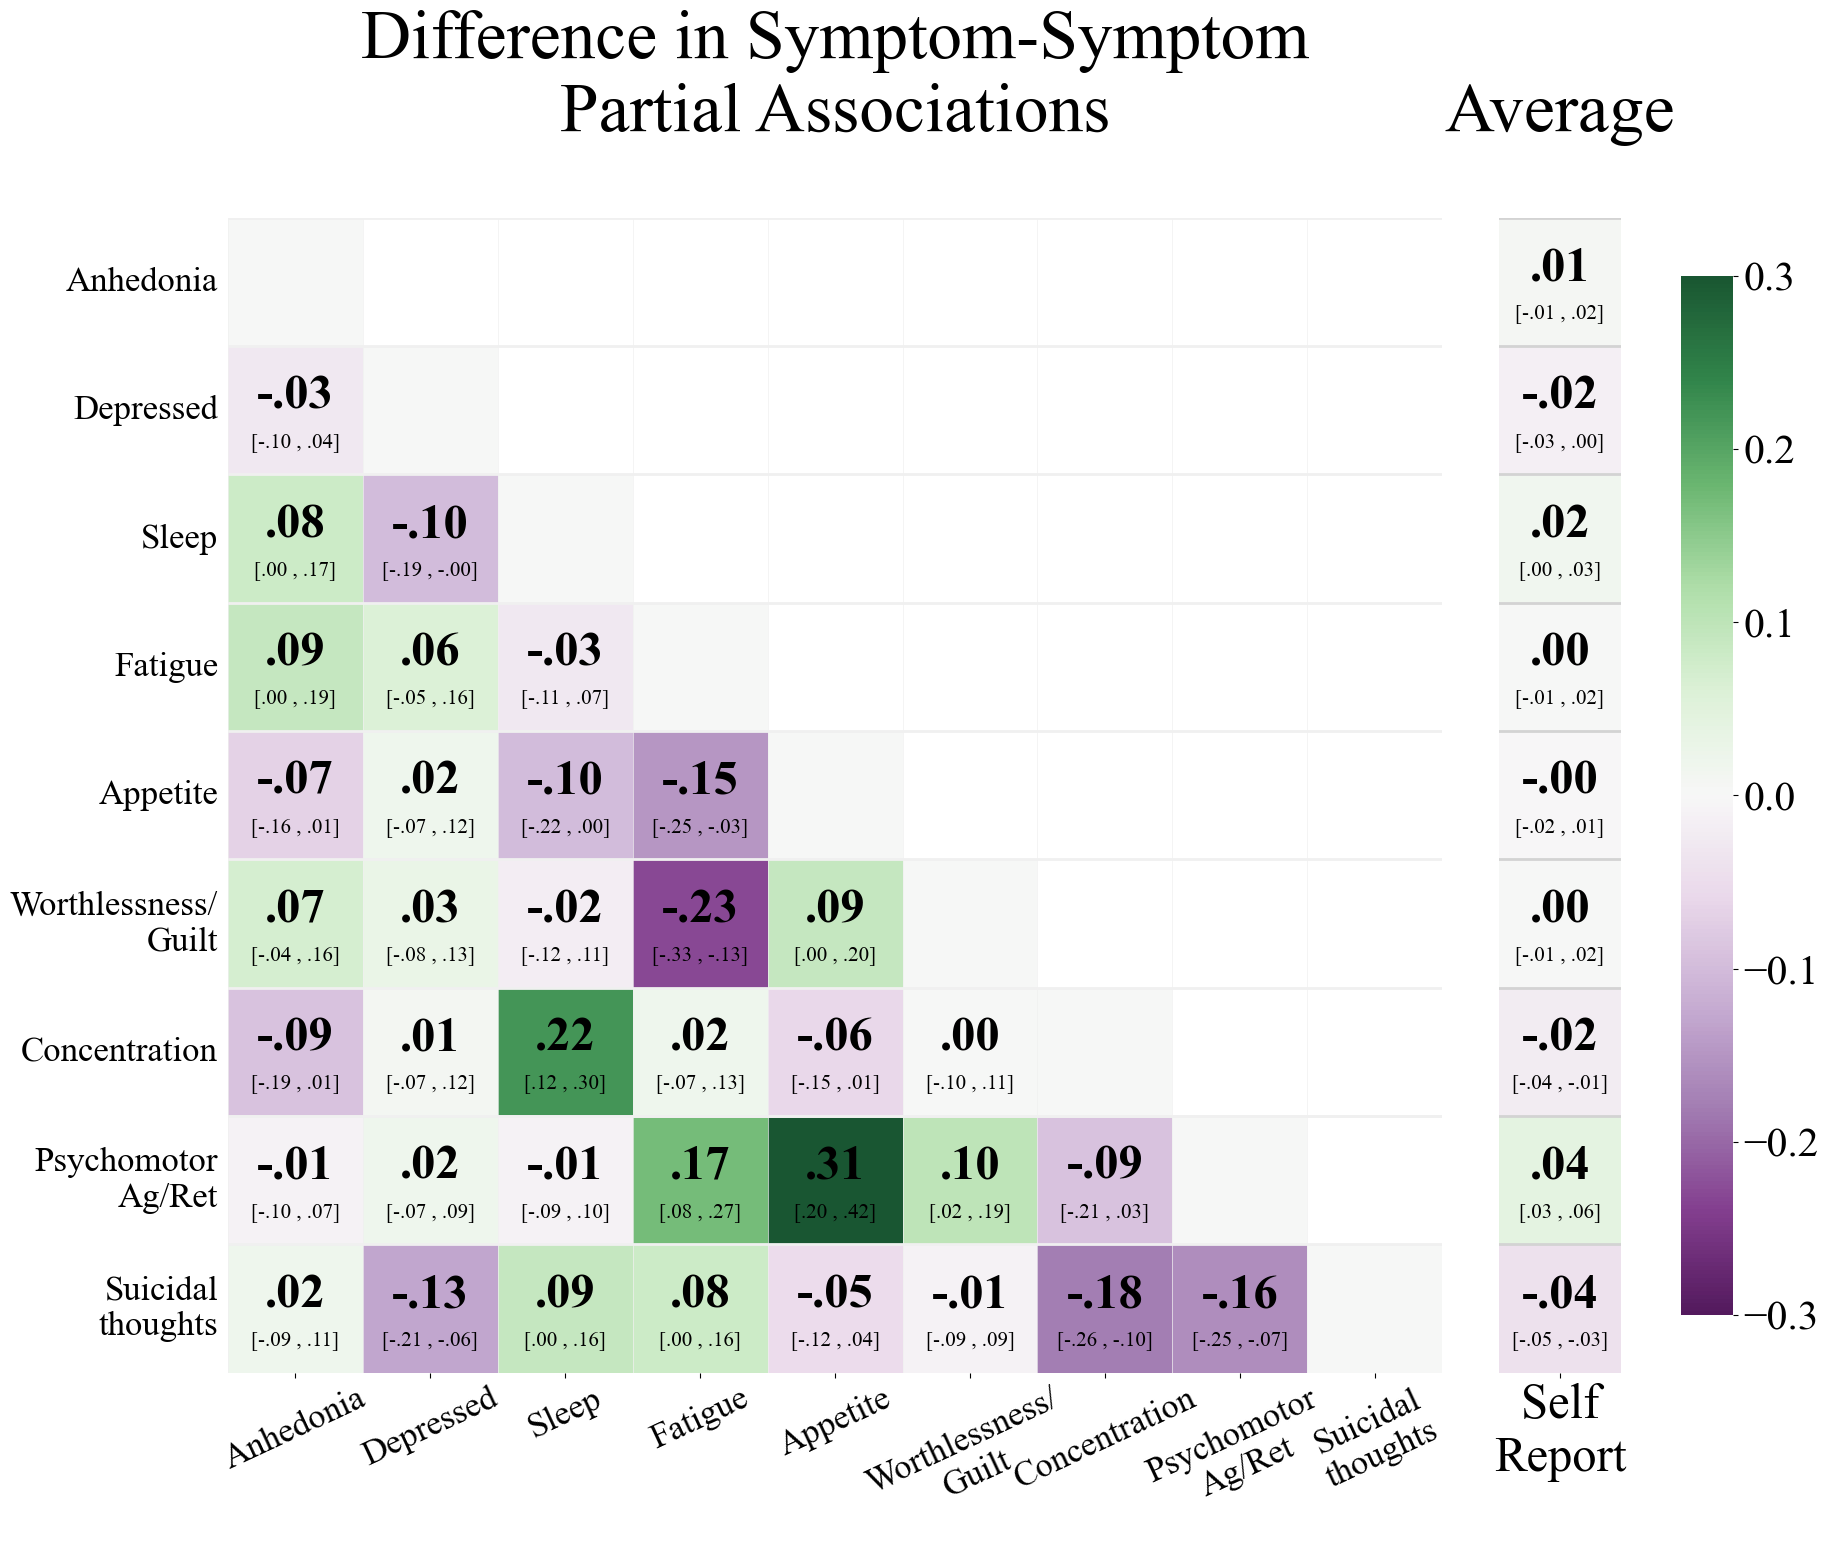

In [30]:
common_user_ids = set(gpt4_df['user_id']).intersection(set(self_report_df['user_id']))
x_y = pd.merge(gpt4_df, self_report_df, on='user_id', suffixes=('_gpt4', '_selfreport'))
gpt4_df_merge = gpt4_df[gpt4_df['user_id'].isin(common_user_ids)]
self_report_df_merge = self_report_df[self_report_df['user_id'].isin(common_user_ids)]

gpt4_items_corr = get_partial_corr(gpt4_df_merge, score_columns)
selfreport_items_corr = get_partial_corr(self_report_df_merge, score_columns)

diff_corr = np.round(gpt4_items_corr.values - selfreport_items_corr.values, 2)
diff_corr_annot = [[f'{val:.2f}'[-3:] if val>=0 else '-'+f'{val:.2f}'[-3:] for val in row] for row in diff_corr]
for i in range(9): diff_corr_annot[i][i] = '' 

corrs_trials = []
avg_corr_trials = []
for trial in range(100):
    # sample shape[0] users with replacement
    x_y_sample = x_y.sample(n=x_y.shape[0], replace=True, random_state=trial)
    gpt4_sample_df = x_y_sample[[f'{i}_gpt4' for i in score_columns]].rename(columns={f'{i}_gpt4': i for i in score_columns})
    sr_sample_df = x_y_sample[[f'{i}_selfreport' for i in score_columns]].rename(columns={f'{i}_selfreport': i for i in score_columns})
    
    
    gpt4_sample_corr = get_partial_corr(gpt4_sample_df, score_columns)
    sr_sample_corr = get_partial_corr(sr_sample_df, score_columns)
    sample = gpt4_sample_corr - sr_sample_corr
    # calculate the correlation matrix
    diff_corr_df = sample.values.round(2)
    # append to corrs_trials
    corrs_trials.append(diff_corr_df)
    avg_sample = (diff_corr_df.sum(axis=1)/8.0).reshape(-1, 1)
    avg_corr_trials.append(avg_sample)

# create a 3D array of the correlation matrices
corrs_trials = np.array(corrs_trials)
avg_corr_trials = np.array(avg_corr_trials)
# sort along the trials axis and take the 2.5th and 97.5th percentiles
lower_bound = np.percentile(corrs_trials, 2.5, axis=0)
upper_bound = np.percentile(corrs_trials, 97.5, axis=0)
avg_lower_bound = np.percentile(avg_corr_trials, 2.5, axis=0)
avg_upper_bound = np.percentile(avg_corr_trials, 97.5, axis=0)

# annotate the corr_df_annot with [lower_bound, upper_bound] below the correlation values in smaller font
conf_bounds_annot = corr_df_annot.copy()
for idx in range(9):
    for jdx in range(9):
        if idx != jdx:
            lwr_bound_annot = f'{lower_bound[idx, jdx]:.2f}'[-3:] if lower_bound[idx, jdx]>=0 else '-'+f'{lower_bound[idx, jdx]:.2f}'[-3:]
            upr_bound_annot = f'{upper_bound[idx, jdx]:.2f}'[-3:] if upper_bound[idx, jdx]>=0 else '-'+f'{upper_bound[idx, jdx]:.2f}'[-3:]
            conf_bounds_annot.iloc[idx, jdx] = '['+lwr_bound_annot+' , '+ upr_bound_annot+']'

conf_bounds_avg_annot = []
for i in range(9):
    lower_bound_annot = f'{avg_lower_bound[i][0]:.2f}'[-3:] if avg_lower_bound[i][0]>=0 else '-'+f'{avg_lower_bound[i][0]:.2f}'[-3:]
    upper_bound_annot = f'{avg_upper_bound[i][0]:.2f}'[-3:] if avg_upper_bound[i][0]>=0 else '-'+f'{avg_upper_bound[i][0]:.2f}'[-3:]
    conf_bounds_avg_annot.append('['+lower_bound_annot+' , '+ upper_bound_annot+']')

mask = np.zeros_like(diff_corr, dtype="bool")
mask[np.triu_indices_from(mask)] = True

# Want diagonal elements as well
mask[np.diag_indices_from(mask)] = False


f = plt.figure(figsize=(21, 15))
gs1 = gridspec.GridSpec(1, 2, figure=f, right=0.875, width_ratios=[0.80, 0.20], wspace=0.075)
# gs2 = gridspec.GridSpec(1, 2, figure=f, left=0.82, bottom=0.3, width_ratios=[0.5, 0.5], wspace=0.1)

a0 = f.add_subplot(gs1[0])
a1 = f.add_subplot(gs1[1])


sns.heatmap(diff_corr, annot=False, mask=mask, cmap=custom_cmap, vmin=-.3, vmax=.3, alpha=0.9, fmt='',  
            annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'}, 
            ax=a0, cbar=False)

# Add custom annotations
for i in range(9):
    for j in range(9):
        if not mask[i, j]:
            corr_text = f'{diff_corr_annot[i][j]}'
            conf_bounds = conf_bounds_annot.iloc[i, j]
            
            a0.text(j + 0.5, i + 0.4, corr_text, ha='center', va='center',
                    fontsize=35, fontweight='bold', color='black', fontproperties=custom_font_bold)
            if i!= j:
                a0.text(j + 0.5, i + 0.75, conf_bounds, ha='center', va='center',
                    fontsize=15, color='black', fontproperties=custom_font)


a0.tick_params(left=False, bottom=True)

for i in range(9):
    a0.axhline(i, color='#f0f0f0', lw=2)
    a0.axvline(i, color='#f0f0f0', lw=.5)
# a0.axhline(7, color='white', lw=6)
a0.axhline(7, color='#f0f0f0', lw=2)

tick_pos = range(9)
tick_labels = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']
tick_labels_y = ['Anhedonia', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Worthlessness/\nGuilt', 'Concentration', 'Psychomotor\nAg/Ret', 'Suicidal\nthoughts']

a0.set_xticklabels(tick_labels, rotation=25, fontsize=25, fontproperties=custom_font)
a0.set_yticklabels(tick_labels_y, rotation=0, fontsize=25,  fontproperties=custom_font)

avgs = (diff_corr.sum(axis=1)/8.0).reshape(-1, 1)
avgs_annot = [[f'{v:.2f}'[-3:] if v>=0 else '-'+f'{v:.2f}'[-3:] for v in row] for row in avgs]

sns.heatmap(avgs, annot=False, cmap=custom_cmap, vmin=-0.3, vmax=0.3, alpha=0.9, fmt='', ax=a1, annot_kws={
                'fontsize': 35,
                'fontweight': 'bold',
                'fontproperties': custom_font_bold,
                'color': 'black'
            }, cbar_kws={'fraction': 0.4, 'shrink':0.9, 'pad': 0.2}, cbar=True)

for i in range(9):
    corr_text = avgs_annot[i][0]
    conf_bounds = conf_bounds_avg_annot[i]
    a1.text(0.5, i + 0.4, corr_text, ha='center', va='center',
            fontsize=35, fontweight='bold', color='black', fontproperties=custom_font_bold)
    a1.text(0.5, i + 0.75, conf_bounds, ha='center', va='center',
            fontsize=15, color='black', fontproperties=custom_font)
    a1.axhline(i, color='lightgray', lw=2)
# a1.axhline(7, color='white', lw=6)

a1.set_yticklabels([], rotation=0, fontsize=27,  fontproperties=custom_font)
a1.yaxis.tick_right()
a1.tick_params(right=False, bottom=True, left=False)
a1.set_xticklabels(['Self\nReport'], rotation=0, fontsize=35,  fontproperties=custom_font)

cbar = a1.collections[0].colorbar
# Apply font properties to the colorbar's tick labels
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(custom_font)
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=30)

# # Add ghost axes and titles on gs1 and gs2
# ax_left = f.add_subplot(gs1[:])
# ax_left.axis('off')
a0.set_title('Difference in Symptom-Symptom\nPartial Associations\n', fontsize=50, fontproperties=custom_font)

# ax_right = f.add_subplot(gs2[:])
# ax_right.axis('off')
a1.set_title('Average\n', fontsize=50, fontproperties=custom_font)



# plt.savefig('../data/figures/diff_gpt4_sr_corr_triu.png', dpi=1040, bbox_inches='tight')
# plt.savefig('../data/figures/diff_gpt4_sr_corr_triu.pdf', dpi=1040, bbox_inches='tight')
plt.show()
# save figure


## Training models to understand the effect explicit scores on implicit symptoms

In [6]:
def get_symptom_scores(df:pd.DataFrame, imp_symptom:str, infill=None):
    exp_columns = symptoms_columns.copy()
    exp_columns.remove(imp_symptom)
    exp_columns_isInferred = ['isInferred_'+symptom for symptom in exp_columns]
    exp_columns_score = ['score_'+ symptom for symptom in exp_columns]
    y = df[df['isInferred_'+imp_symptom]==1]['score_'+imp_symptom]
    X = df[df['isInferred_'+imp_symptom]==1][exp_columns_score]
    z = df[df['isInferred_'+imp_symptom]==1][exp_columns_isInferred]
    
    if infill == 'zero':
        # for each column, turn the rows that had implicit mention of symptoms in X to  0
        for column in exp_columns: X.loc[z['isInferred_'+column]==1, 'score_'+column] = 0
    elif infill == 'mean':
        # for each column, turn the rows that had implicit mention of symptoms in X to mean of the column when it was explicit
        for column in exp_columns:
            mean_val = X.loc[z['isInferred_'+column]==0, 'score_'+column].mean()
            if np.isnan(mean_val): mean_val = 0
            X.loc[z['isInferred_'+column]==1, 'score_'+column] = mean_val
    
    return X, y, exp_columns    